In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
df = pd.read_csv('./agaricus_lepiota_dataset/agaricus_lepiota_small_c.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,w,b,g,...,s,w,w,p,w,o,p,n,v,d
1,e,f,s,y,f,n,f,c,b,p,...,s,w,w,p,w,o,f,n,y,g
2,e,k,s,w,f,c,f,w,b,g,...,s,w,n,p,w,t,e,w,n,g
3,e,f,f,n,t,n,f,c,b,w,...,s,g,w,p,w,o,p,k,v,d
4,p,x,s,w,t,p,f,c,n,w,...,s,w,w,p,w,o,p,n,s,u


In [9]:
df = df.replace("e",0)
df = df.replace("p",1)

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,s,y,t,a,f,w,b,g,...,s,w,w,1,w,o,1,n,v,d
1,0,f,s,y,f,n,f,c,b,1,...,s,w,w,1,w,o,f,n,y,g
2,0,k,s,w,f,c,f,w,b,g,...,s,w,n,1,w,t,0,w,n,g
3,0,f,f,n,t,n,f,c,b,w,...,s,g,w,1,w,o,1,k,v,d
4,1,x,s,w,t,1,f,c,n,w,...,s,w,w,1,w,o,1,n,s,u


In [21]:
#df = df.drop(columns='stalk-root')
df.shape, list(df.columns)

((1000, 22),
 ['class',
  'cap-shape',
  'cap-surface',
  'cap-color',
  'bruises',
  'odor',
  'gill-attachment',
  'gill-spacing',
  'gill-size',
  'gill-color',
  'stalk-shape',
  'stalk-surface-above-ring',
  'stalk-surface-below-ring',
  'stalk-color-above-ring',
  'stalk-color-below-ring',
  'veil-type',
  'veil-color',
  'ring-number',
  'ring-type',
  'spore-print-color',
  'population',
  'habitat'])

In [23]:
columns = []
for column in list(df.columns):
    columns.append(column)
    
df.groupby('class').describe()

veil-type                                   
          count mean  std  min  25%  50%  75%  max
class                                             
0         518.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
1         482.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

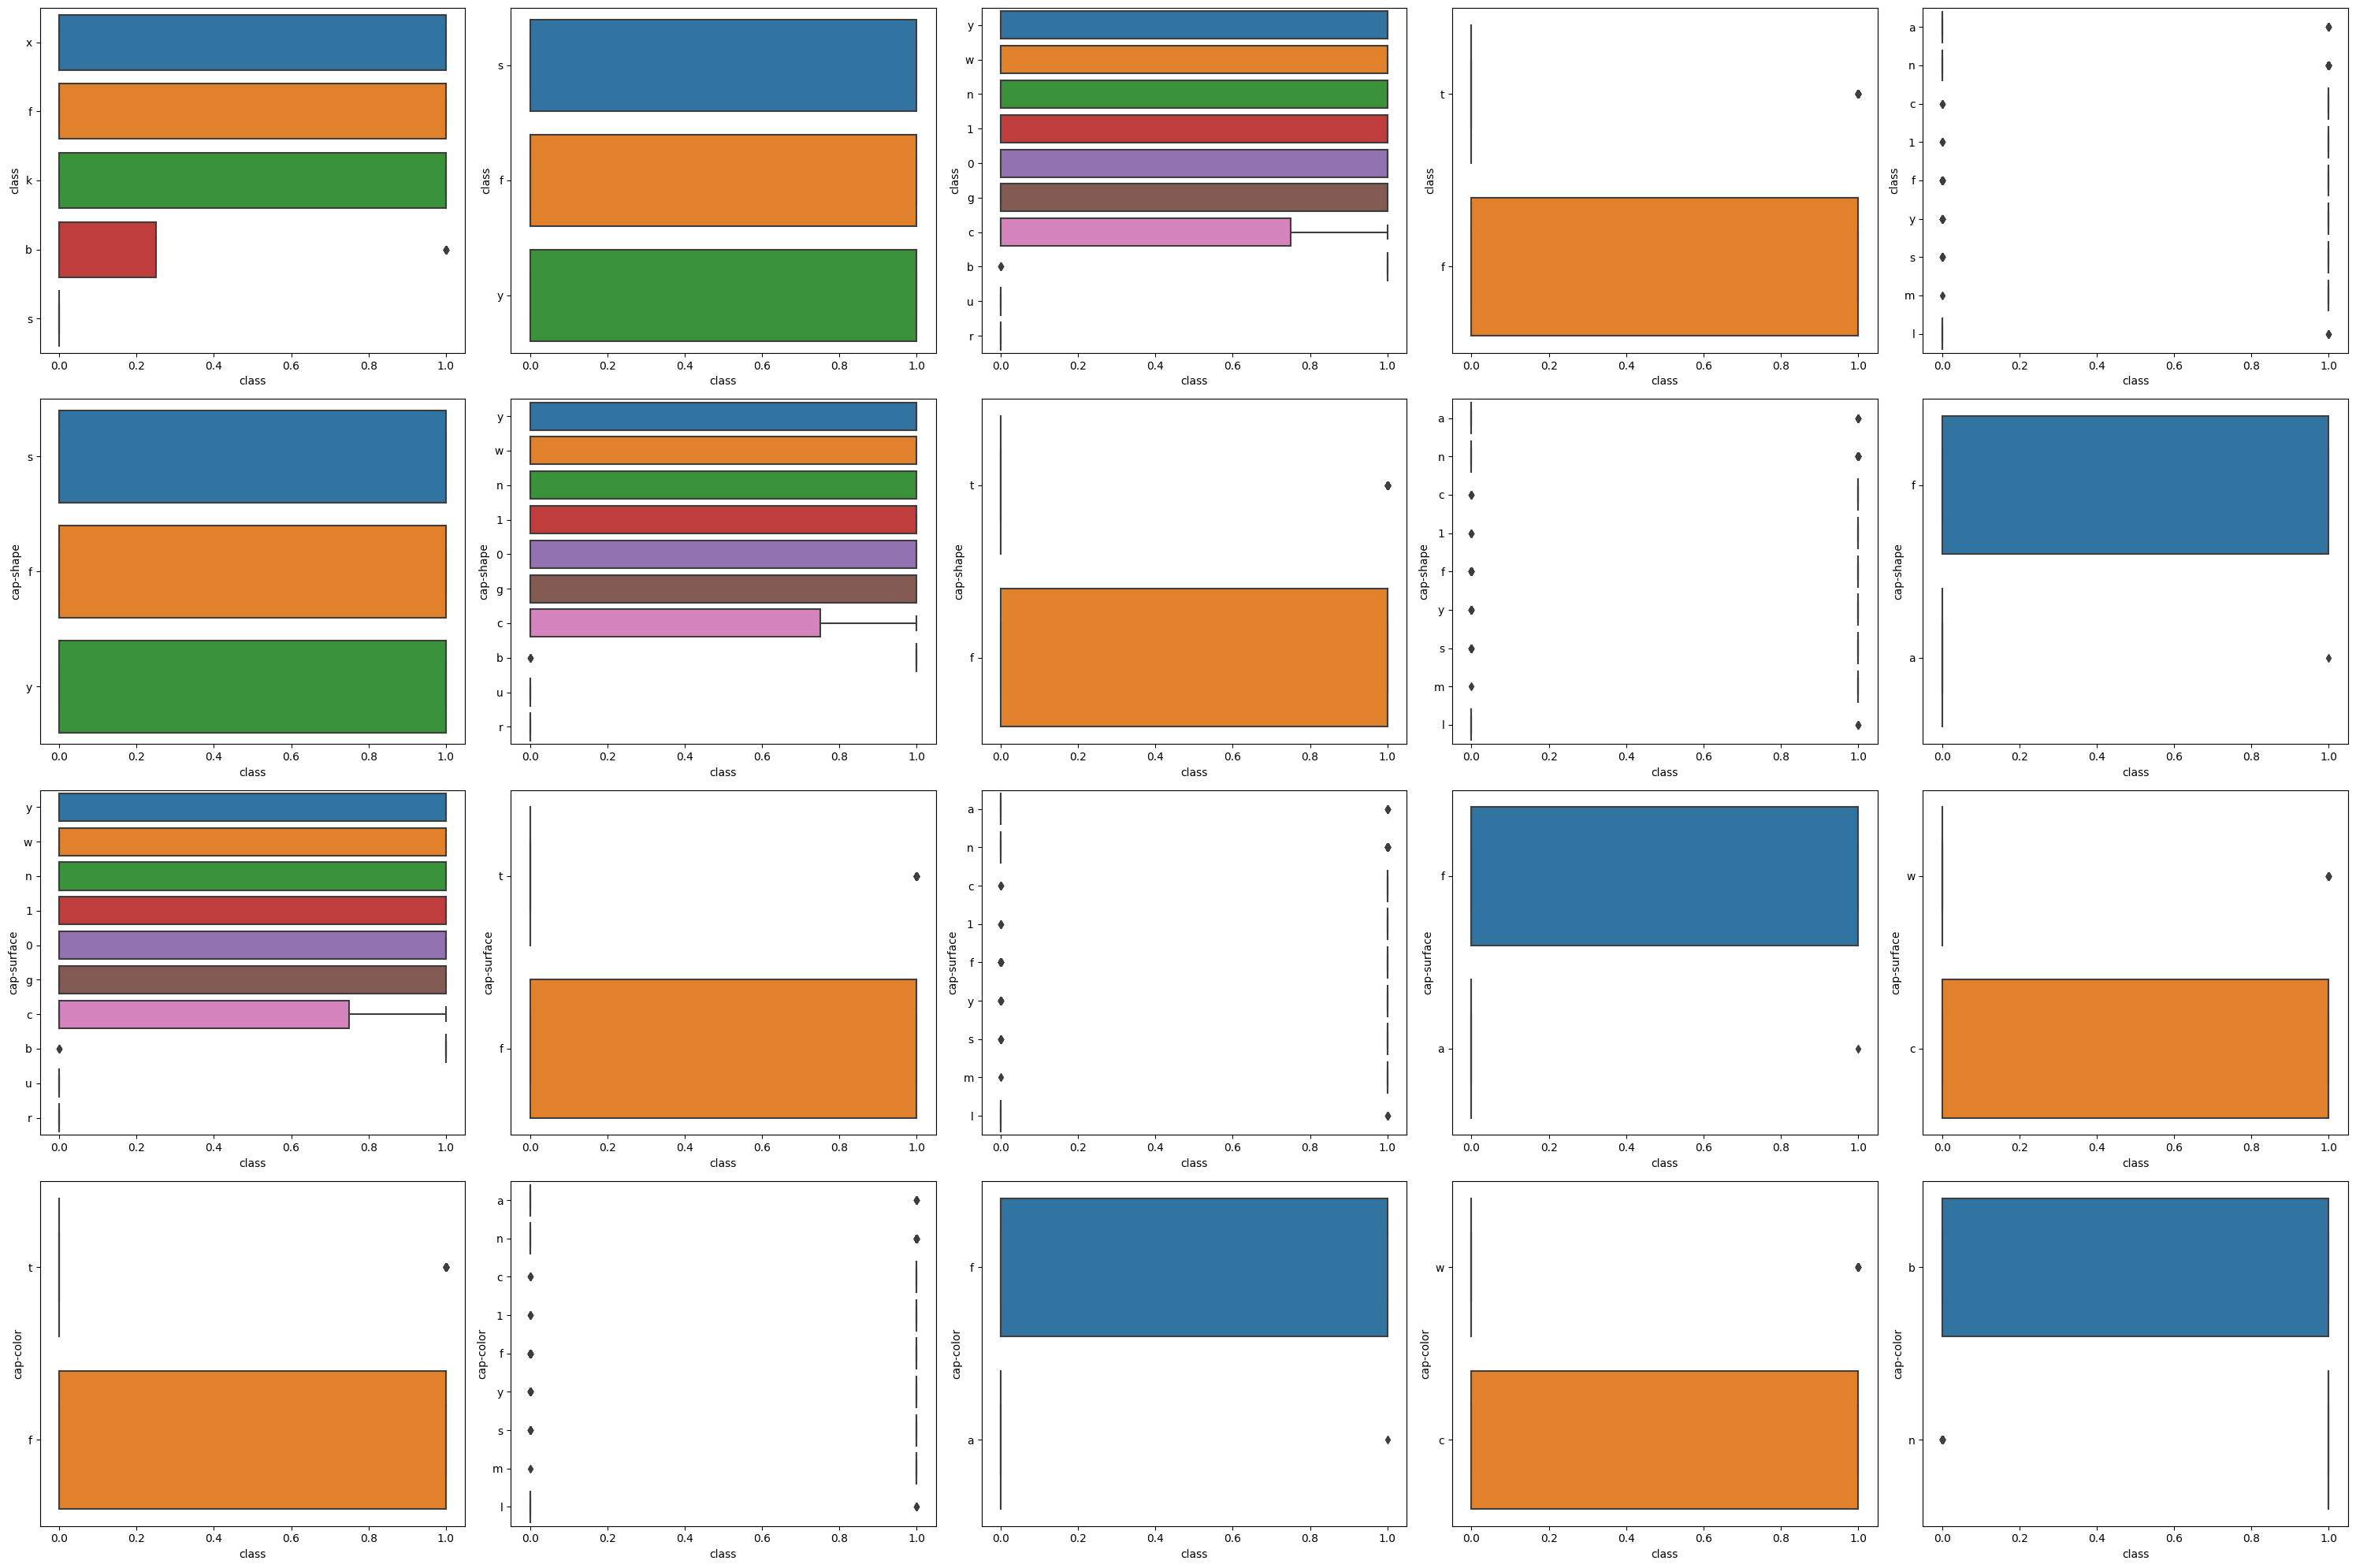

In [47]:
fig, ax = plt.subplots(4,5, figsize=(30, 20))
for i in range(4):
    for j in range(5):
        sns.boxplot(x=columns[0], y=columns[i+j+1], data=df, ax=ax[i][j])
        ax[i][j].set_xlabel(columns[0])
        ax[i][j].set_ylabel(columns[i])

    #sns.histplot(data=df, bins=10, x=columns[i+1], hue="class", multiple='dodge', shrink=0.8, ax=ax[i])
    #ax[i].set_xlabel(columns[i])
    #ax[i].set_ylabel('Contagem')
plt.tight_layout()